In [7]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(viridis)
source("../Scripts/functions.R")
source("../Scripts/plots.R")
options(repr.plot.width=20, repr.plot.height=10)
output="../Results/"
folder="../../../Benchmarking_TrainingDataSelection/Results/"

In [5]:
data_pbmc <- read.csv(paste(sep="/", folder, "celltypeAccuracies_PBMC.csv" ), header = F)

methods <- c("Seurat", "CellID", "SCN", "ItClust", "MLP")
celltypes <- c('B cell','CD14+ monocyte','CD16+ monocyte','CD4+ T cell','Cytotoxic T cell','Dendritic cell',
               'Megakaryocyte', 'Natural killer cell','Plasmacytoid dendritic cell')
steps <-  c(42,100,136,500,1000,2000)

colnames(data_pbmc) <- c("Method", "Version", "CellsPerCelltype", "SetNr", celltypes, "Accuracy")
data_pbmc <- data_pbmc[!(duplicated(data_pbmc[,c("Method", "Version", "CellsPerCelltype", "SetNr")])),]
data_pbmc <- data_pbmc[data_pbmc$CellsPerCelltype %in% steps,]
data_pbmc <- data_pbmc[data_pbmc$Method %in% methods,]

`summarise()` has grouped output by 'Method', 'Version', 'CellsPerCelltype'. You can override using the `.groups` argument.


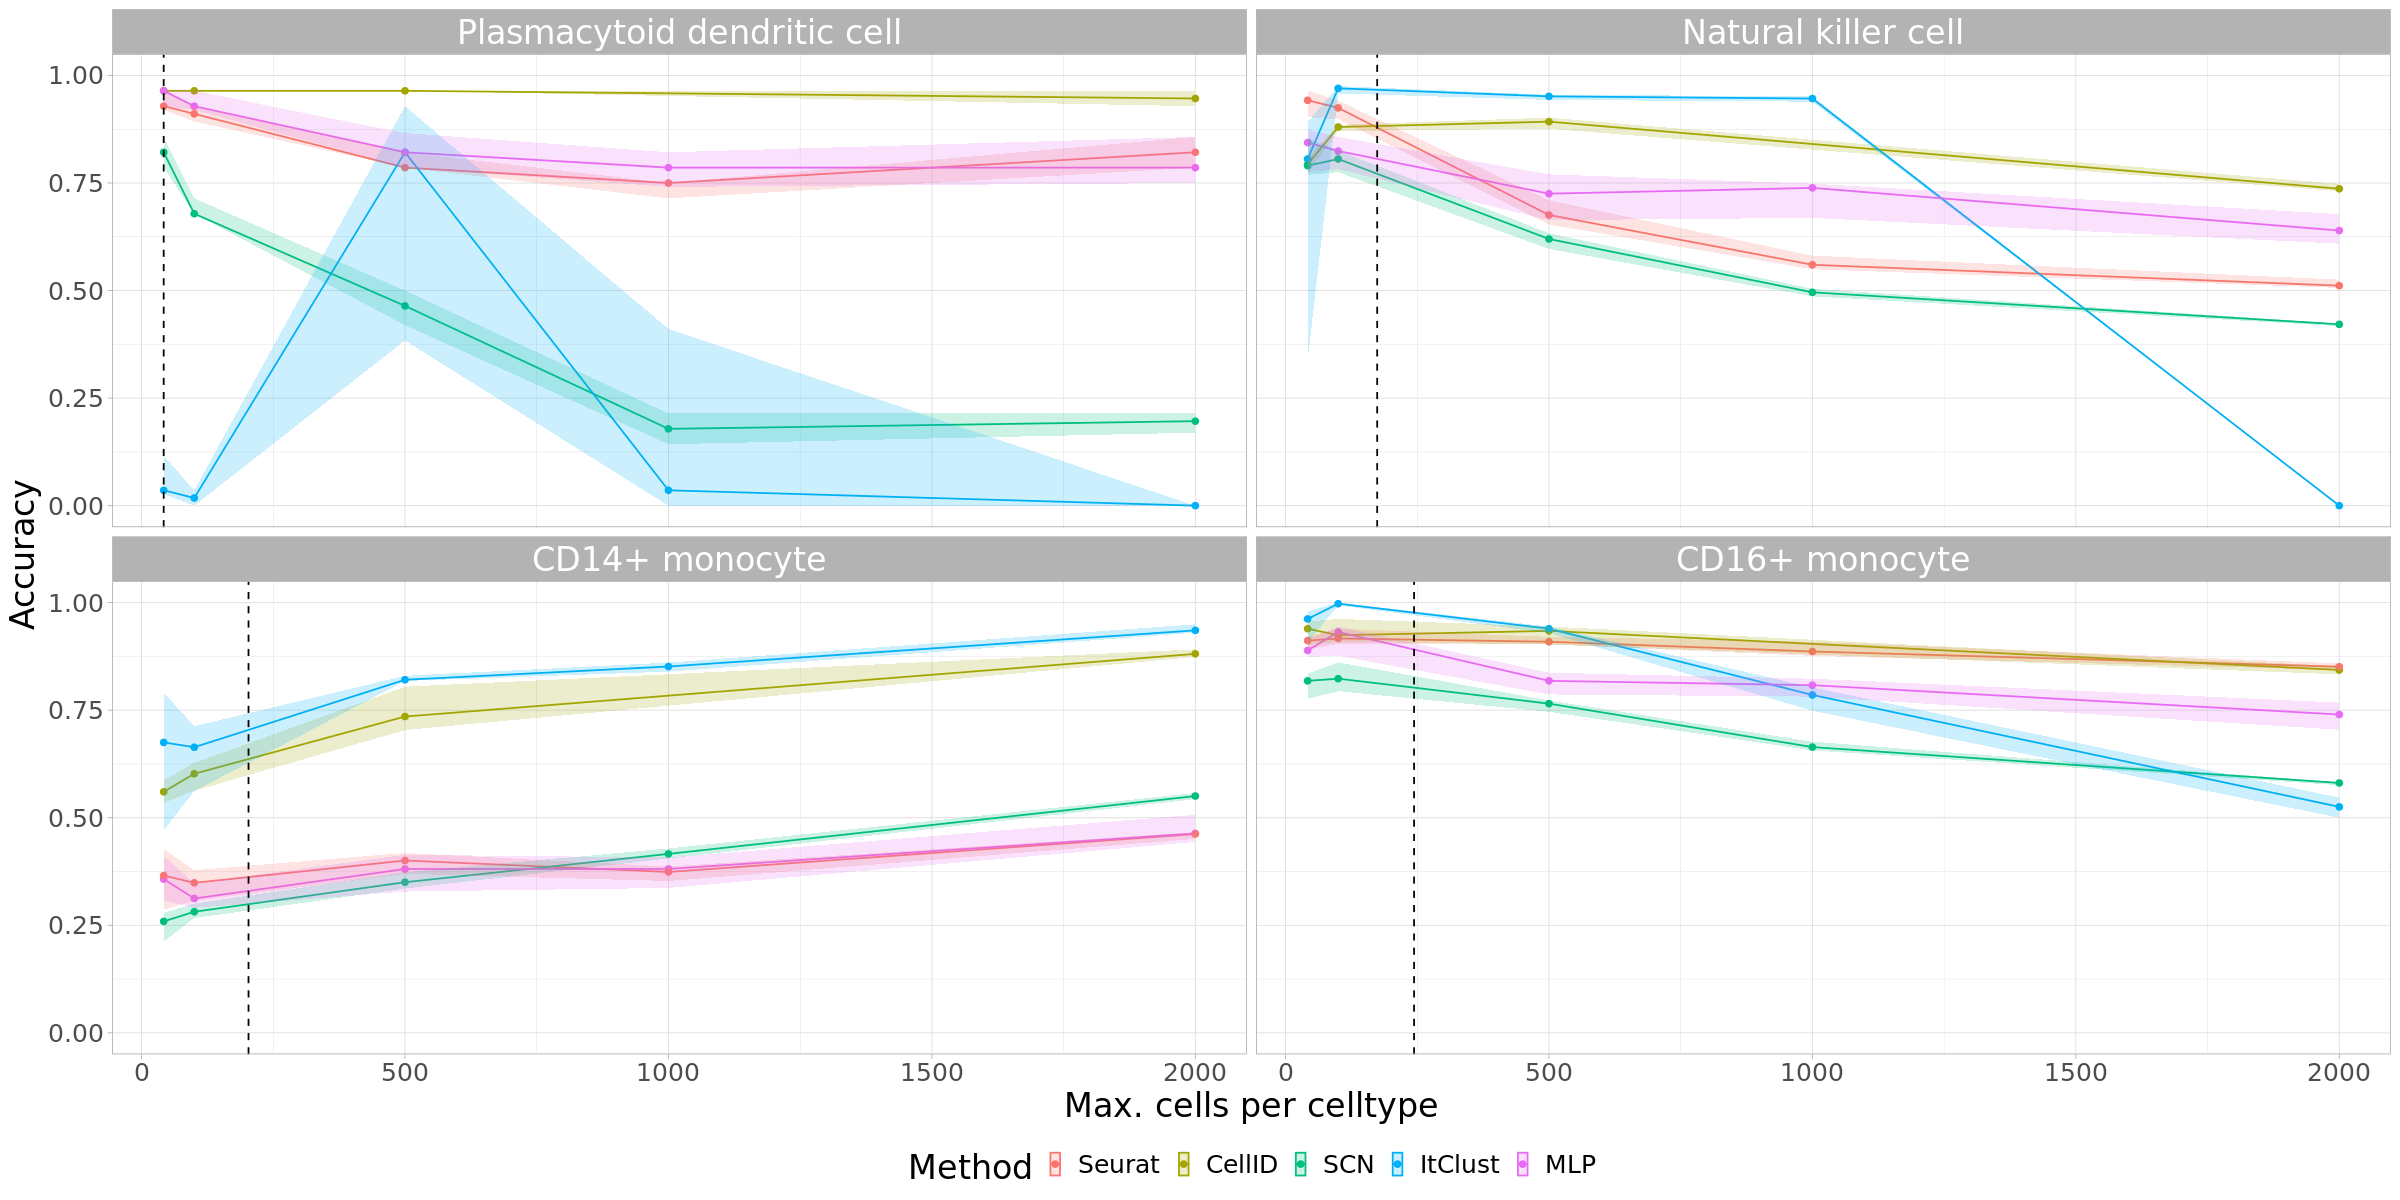

In [8]:
summary_mono <- summarize_data(data_pbmc, "Mono", steps)
summary_mono <- summary_mono[summary_mono$CellType %in% c('Plasmacytoid dendritic cell','Natural killer cell','CD14+ monocyte','CD16+ monocyte'),]
sizes <- data.frame(CellType = c('Plasmacytoid dendritic cell','Natural killer cell','CD14+ monocyte','CD16+ monocyte'), maxSize = c(42,174,203,244))
ncols <- sqrt(length(unique(summary_mono$CellType)))

plot <- ggplot(summary_mono[], aes(x=CellsPerCelltype, y=median, color=factor(Method, levels = methods),fill=factor(Method, levels = methods)))+
    geom_line() + geom_point() +
    geom_ribbon(aes(ymin=q25, ymax=q75, color=NULL), alpha=0.2)+
    labs(color="Method", fill="Method")+ xlab("Max. cells per celltype") + 
    ylab("Accuracy") + ylim(0,1) + theme_light() +
    theme(axis.text=element_text(size=15), axis.title=element_text(size=20),
          legend.title=element_text(size=20), legend.text=element_text(size=15),
          legend.position="bottom",legend.key.size = unit(0.5,"line"),strip.text = element_text(size=20) )+
     geom_vline(aes(xintercept = maxSize), sizes, linetype="dashed")+ 
    facet_wrap(~factor(CellType, levels=c('Plasmacytoid dendritic cell','Natural killer cell','CD14+ monocyte','CD16+ monocyte')),ncol=2)


ggsave(paste0(output, "poster_figure1.png"), plot = plot, device = "png", dpi=350,  width=260, height = 170, units = "mm")
plot

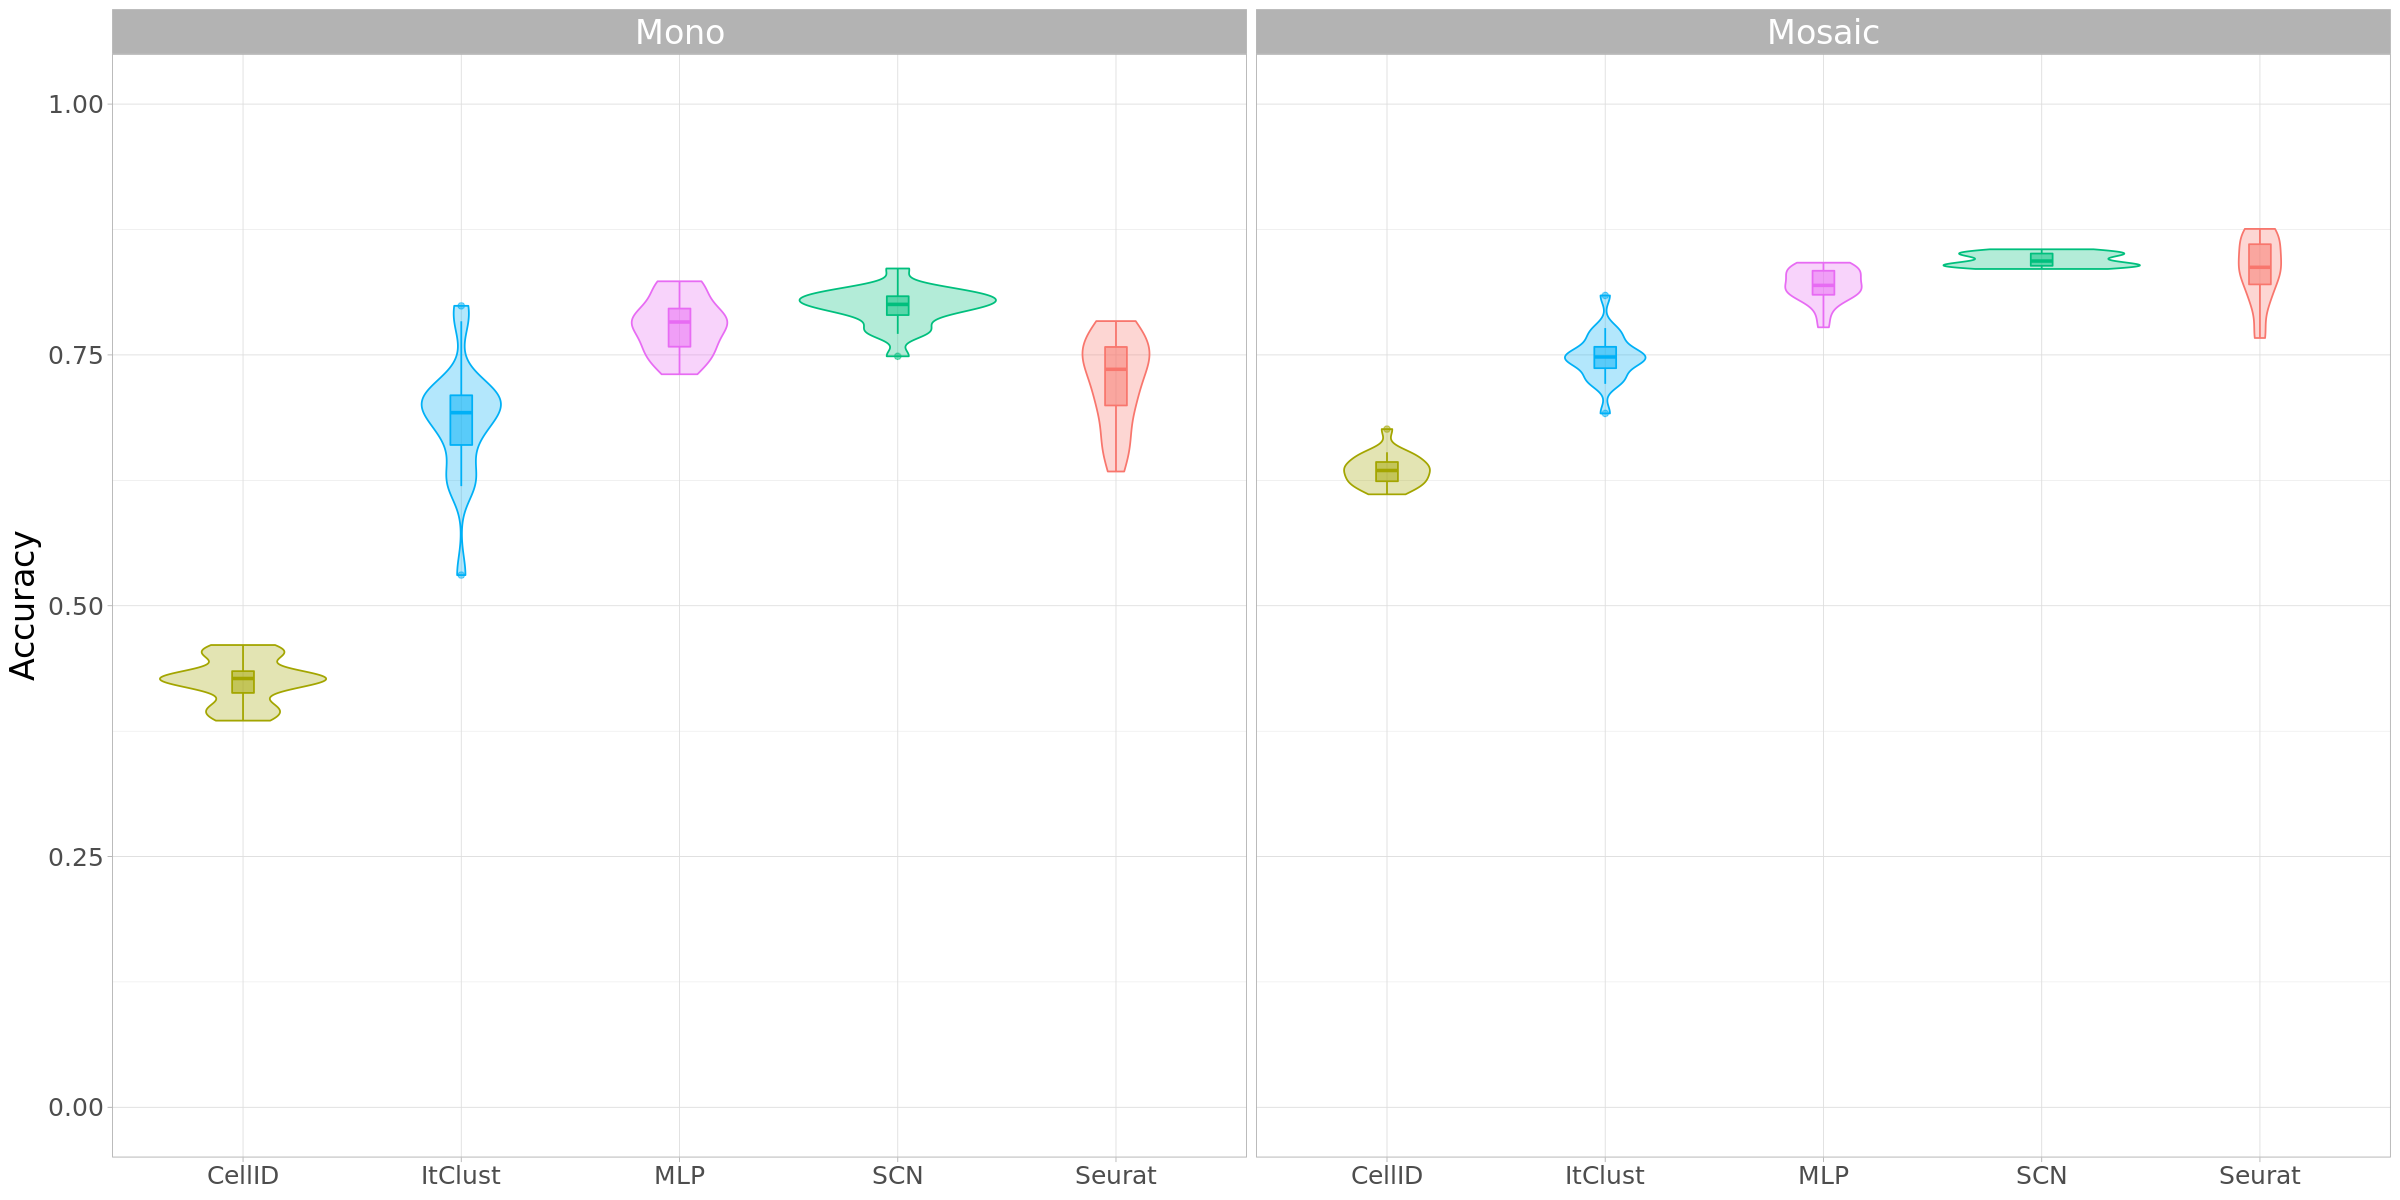

In [9]:
balanced <- data_pbmc[data_pbmc$CellsPerCelltype %in% c(42,136),]
f2 <- ggplot(balanced, aes(Method, Accuracy, fill=factor(Method, levels = methods), color=factor(Method, levels = methods)))+
geom_violin(alpha=0.3)+geom_boxplot(width=0.1, alpha=0.5)+facet_wrap(~Version)+theme_light()+
labs(color="Method", fill="Method")+ xlab(NULL) +  ylab("Accuracy") + ylim(0,1) +
    theme(axis.text=element_text(size=15), axis.title=element_text(size=20),
          legend.position="none",strip.text = element_text(size=20))


ggsave(paste0(output, "poster_figure2.png"), plot = f2, device = "png", dpi=350,  width=260, height = 75, units = "mm")
f2

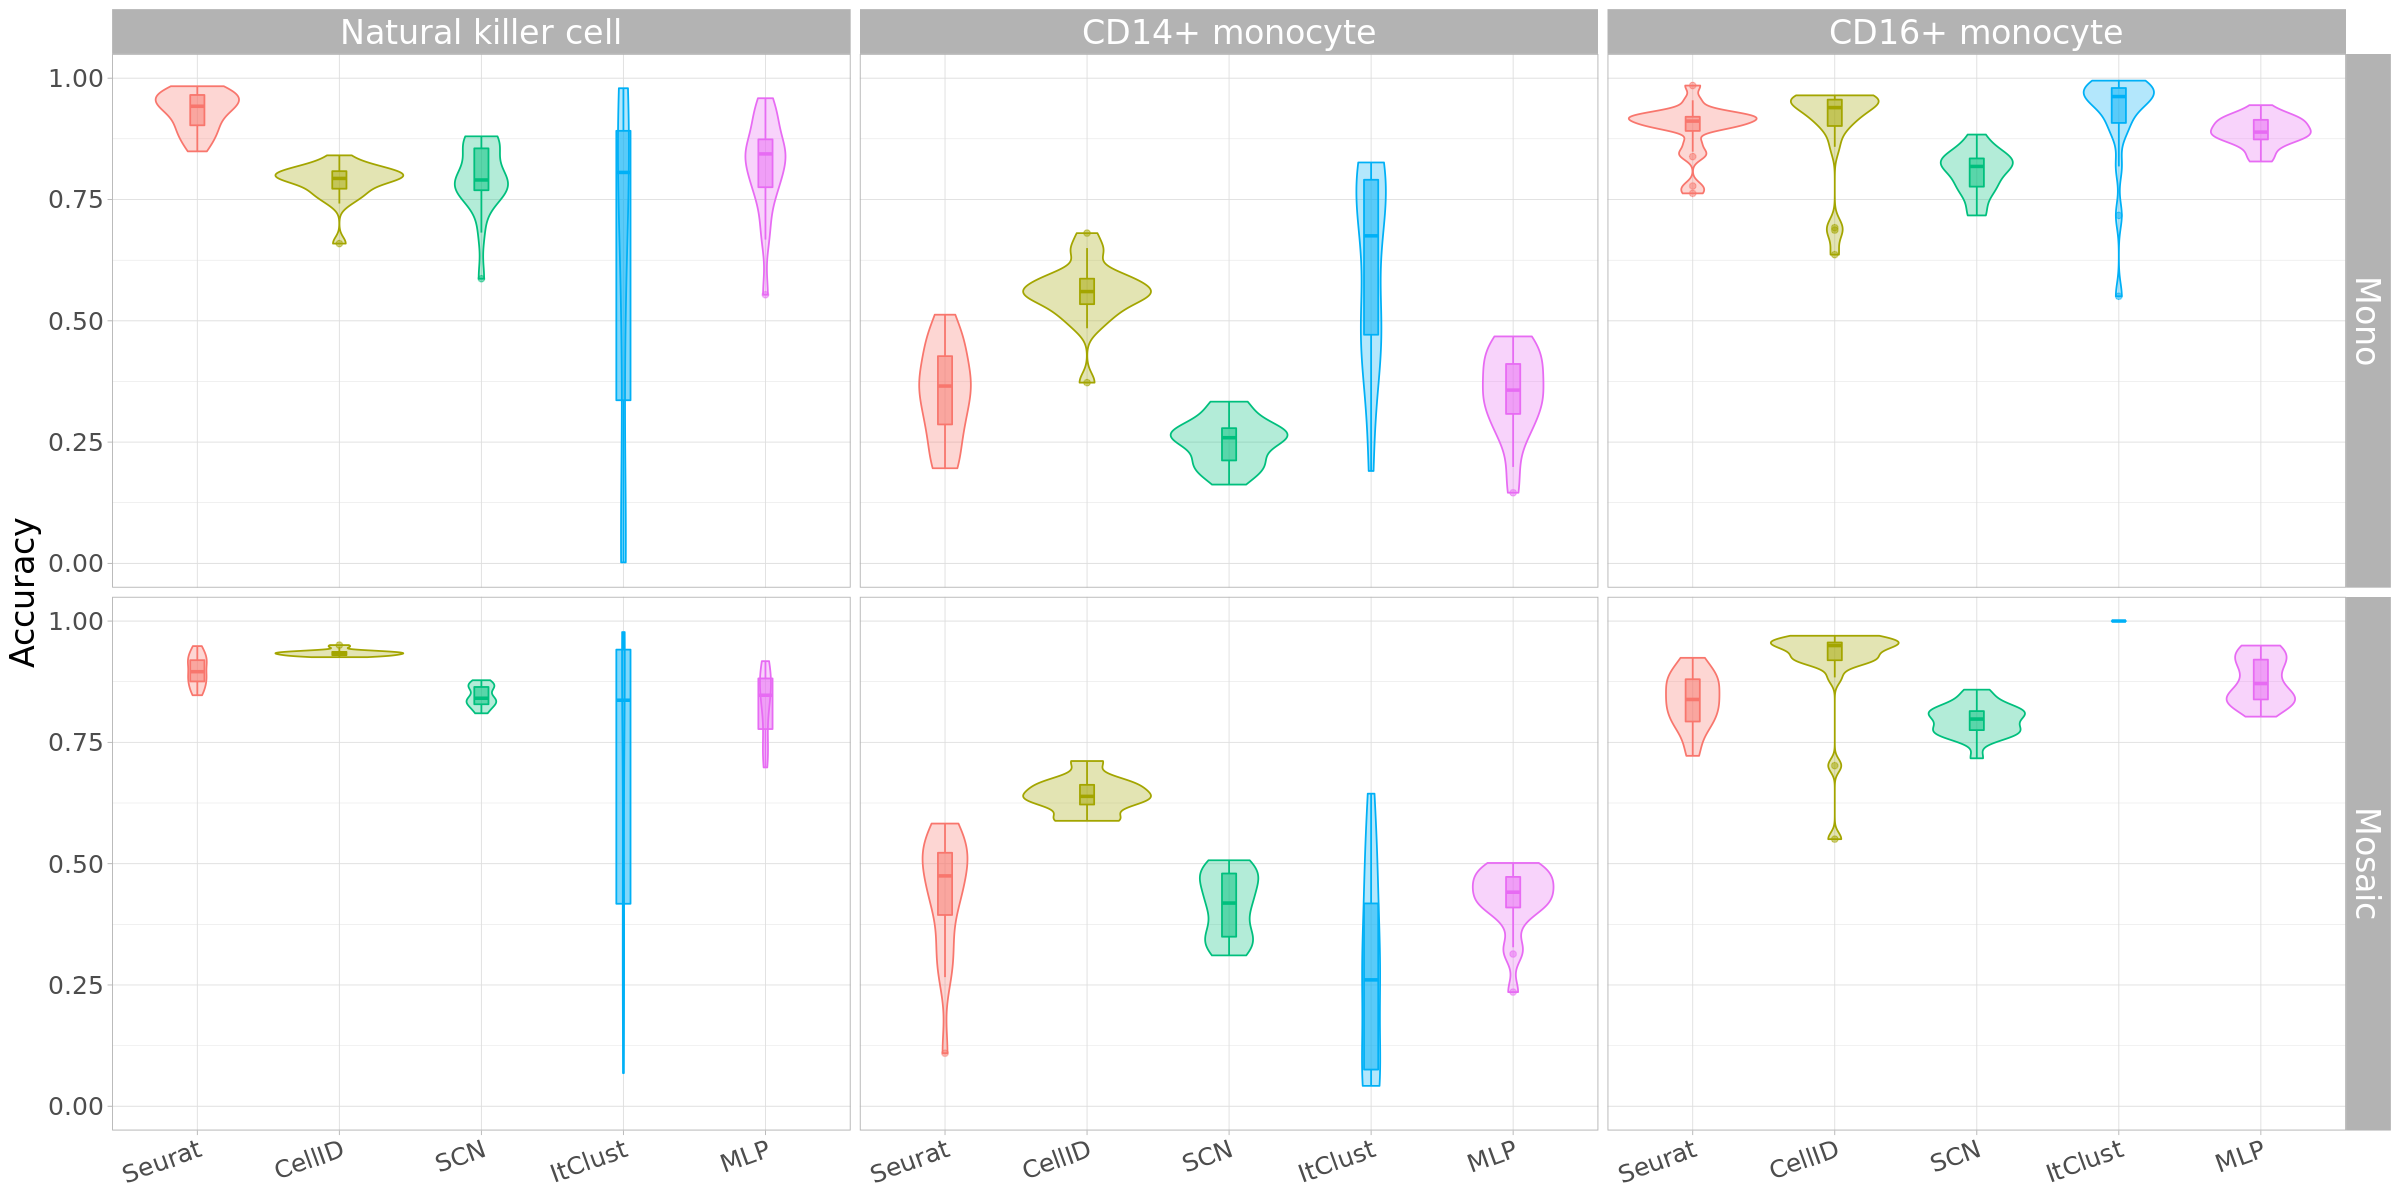

In [10]:
x_melt <- reshape2::melt(balanced, id=c("Method", "Version", "CellsPerCelltype", "SetNr", "Accuracy"))

f3 <- ggplot(x_melt[x_melt$variable %in% c('Natural killer cell','CD14+ monocyte','CD16+ monocyte'),],
             aes(x=factor(Method, levels = methods), y=value, fill=factor(Method, levels = methods),
                               color=factor(Method, levels = methods))) + 
        geom_violin(alpha=0.3) + geom_boxplot(width=0.1, alpha=0.5) +
        xlab(NULL) + ylab("Accuracy") + theme_light()+ ylim(0,1) + 
        theme(axis.text=element_text(size=15), axis.title=element_text(size=20), axis.text.x = element_text(angle = 20, hjust = 1),
          legend.position="none",strip.text = element_text(size=20))+
        facet_grid(rows = vars(Version), cols=vars(factor(variable, levels= c('Natural killer cell','CD14+ monocyte','CD16+ monocyte'))))




ggsave(paste0(output, "poster_figure3.png"), plot = f3, device = "png", dpi=350,  width=260, height = 175, units = "mm")
f3

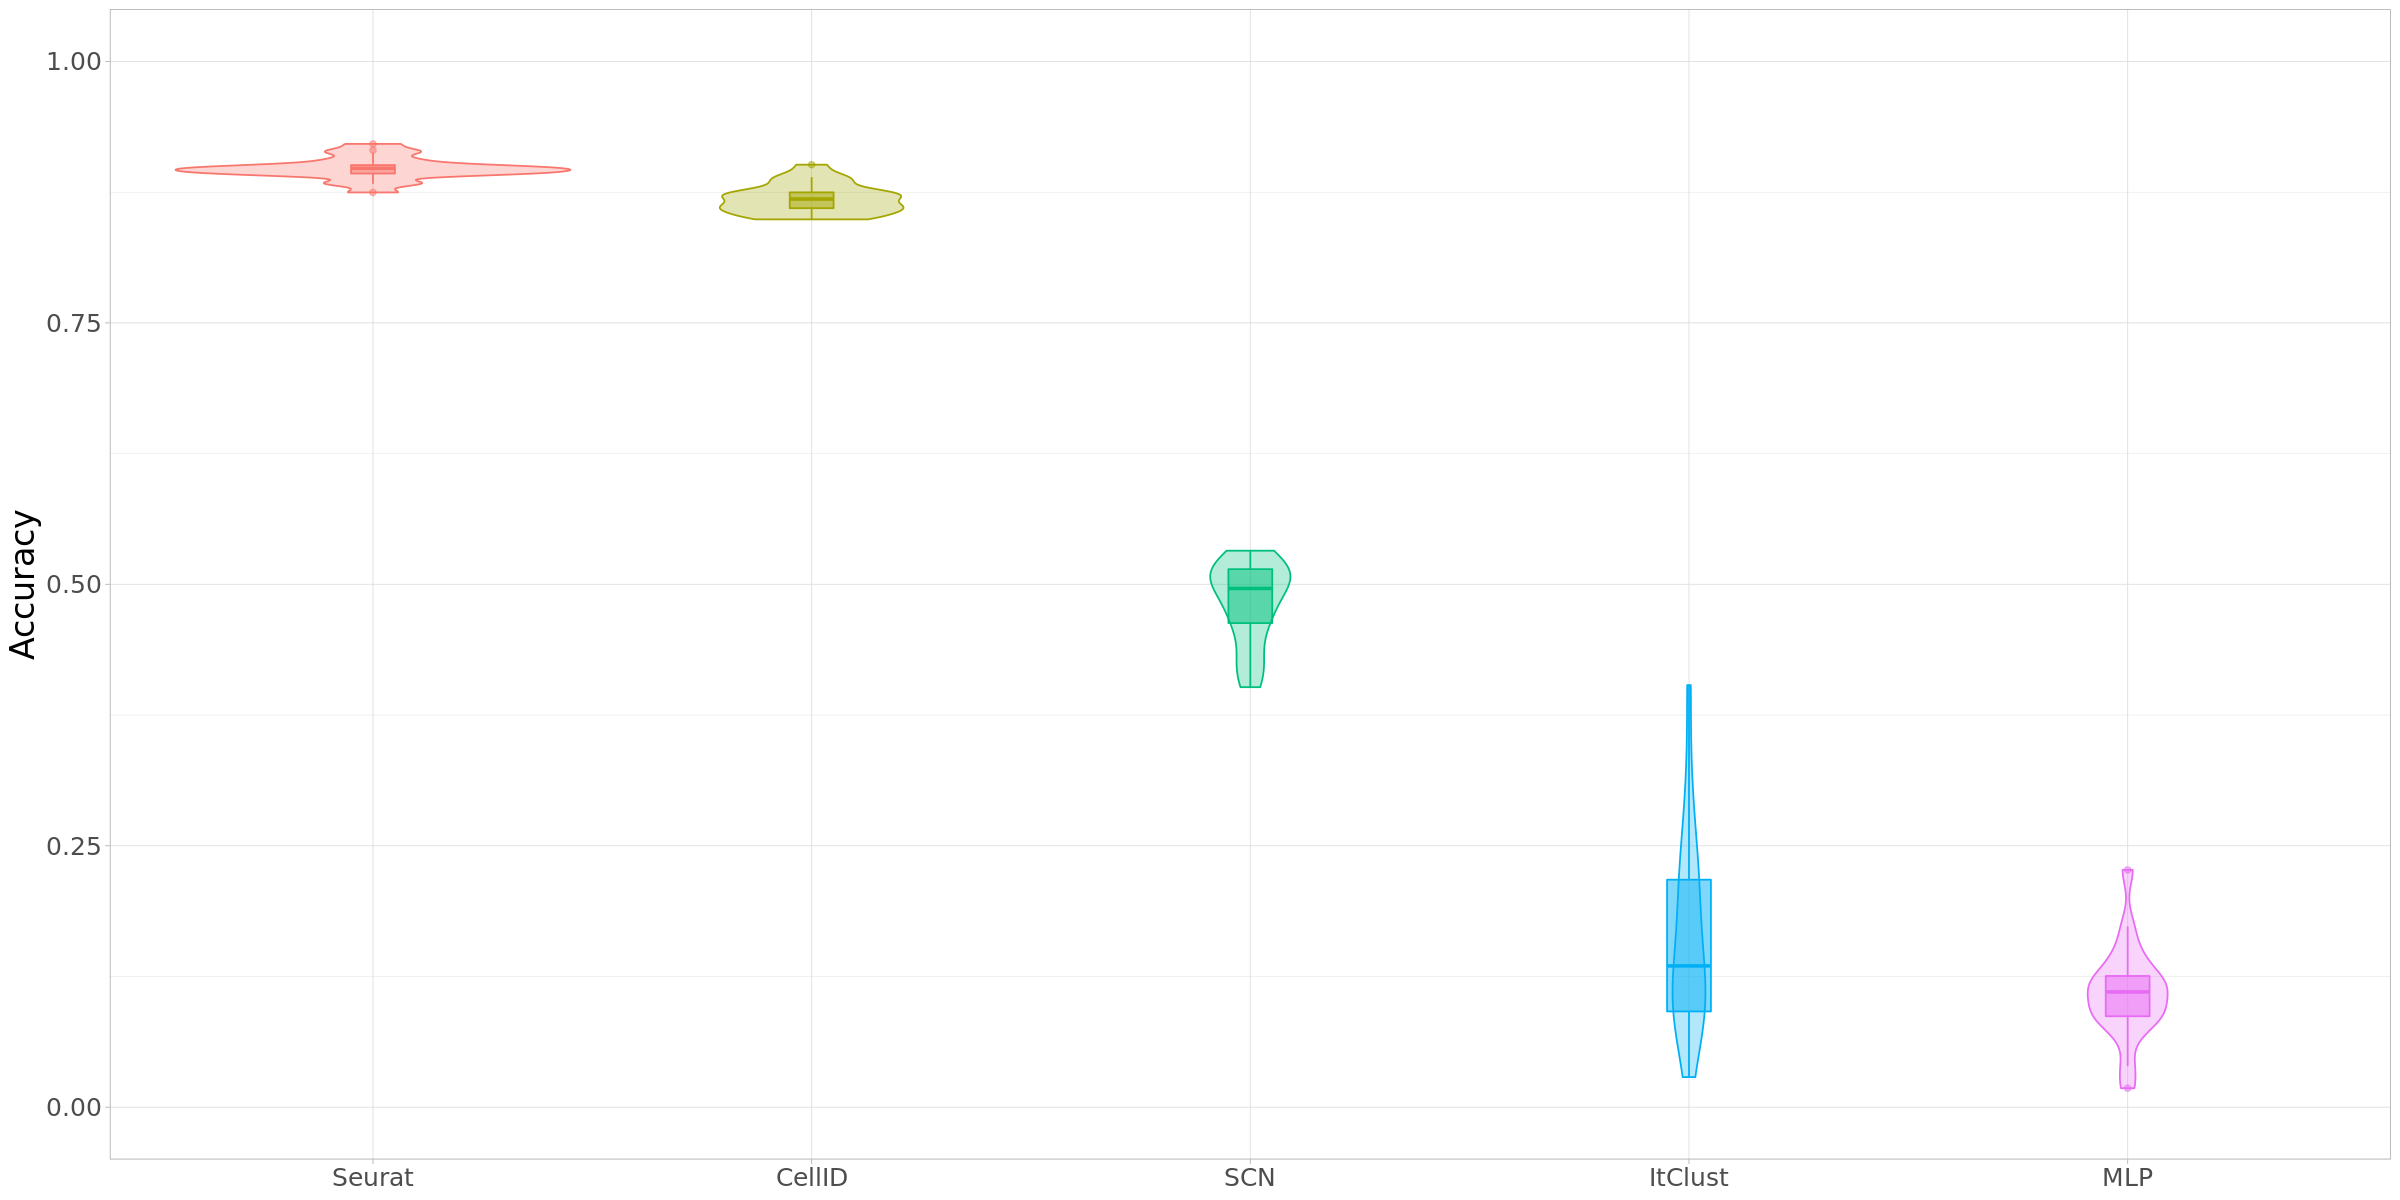

In [12]:
data_cs      <- read.csv(paste(sep="/", folder, "celltypeAccuracies_CrossSpecies.csv", header=F) # accuracy results
methods <- c("Seurat", "CellID", "SCN", "ItClust", "MLP")
celltypes <- c('B Cells','CD Intercalated Cell','Distal Tubules','Endothelial','Loop of Helene','Macrophage', 'Natural Killer Cells',
               'Proximal Tubule', "T Cells")
colnames(data_cs) <- c("Method", "Version", "CellsPerCelltype", "SetNr", celltypes, "Accuracy")
data_cs <- data_cs[data_cs$Method %in% methods,]
data_cs <- data_cs[!(duplicated(data_cs)),]
data_cs <- data_cs[data_cs$CellsPerCelltype==228,]


f3 <- ggplot(data_cs, aes(x=factor(Method, levels = methods), y=Accuracy,
                               fill=factor(Method, levels = methods),
                               color=factor(Method, levels = methods))) + 
        geom_violin(alpha=0.3)+geom_boxplot(width=0.1, alpha=0.5)+ theme_light()+
labs(color="Method", fill="Method")+ xlab(NULL) +  ylab("Accuracy") + ylim(0,1) +
    theme(axis.text=element_text(size=15), axis.title=element_text(size=20),
          legend.position="none",strip.text = element_text(size=25))

ggsave(paste0(output, "poster_figure4.png"), plot = f3, device = "png", dpi=350,  width=260, height = 75, units = "mm")

f3